# Julia 1.4

https://docs.julialang.org/en/v1.4/NEWS/#

In [10]:
VERSION

v"1.4.2"

In [2]:
println("Hello 1.4")

Hello 1.4


In [3]:
using FFTW
using LinearAlgebra
a = 2 * rand(10) .- 1
norm(ifft(fft(a)) - a)

0.0

In [4]:
using PyCall
# pygui(true)
using PyPlot
import Random:seed!; seed!(99)
import LinearAlgebra:norm

function activate(x,W,b)
    return 1 ./ (1 .+ exp.(-(W*x+b)))
end

x1 = [0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]
x2 = [0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]
y = [ones(1,5) zeros(1,5) ; zeros(1,5) ones(1,5)]

W2 = 0.5*randn(2,2); W3 = 0.5*randn(3,2); W4 = 0.5*randn(2,3);
b2 = 0.5*randn(2,1); b3 = 0.5*randn(3,1); b4 = 0.5*randn(2,1);

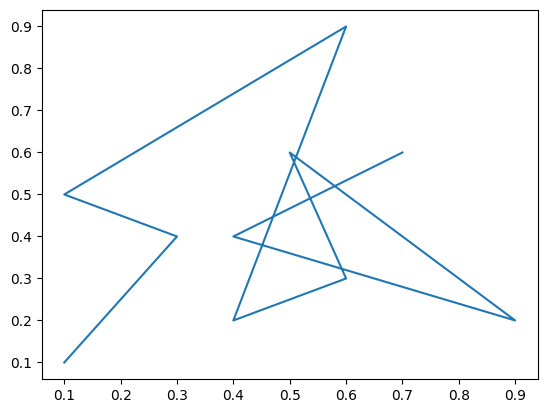

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f321011f358>

In [5]:
PyPlot.plot(x1, x2)

In [6]:
using Pkg

In [7]:
for i = 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [8]:
using NLopt

function myfunc(x::Vector, grad::Vector)
    if length(grad) > 0
        grad[1] = 0
        grad[2] = 0.5/sqrt(x[2])
    end
    return sqrt(x[2])
end

function myconstraint(x::Vector, grad::Vector, a, b)
    if length(grad) > 0
        grad[1] = 3a * (a*x[1] + b)^2
        grad[2] = -1
    end
    (a*x[1] + b)^3 - x[2]
end

opt = Opt(:LD_MMA, 2)
opt.lower_bounds = [-Inf, 0.]
opt.xtol_rel = 1e-4

opt.min_objective = myfunc
inequality_constraint!(opt, (x,g) -> myconstraint(x,g,2,0), 1e-8)
inequality_constraint!(opt, (x,g) -> myconstraint(x,g,-1,1), 1e-8)

(minf,minx,ret) = optimize(opt, [1.234, 5.678])
numevals = opt.numevals # the number of function evaluations
println("got $minf at $minx after $numevals iterations (returned $ret)")

got 0.5443310477213124 at [0.3333333342139688, 0.29629628951338166] after 11 iterations (returned XTOL_REACHED)


In [9]:
using Printf

s = 0
for i = [1 2 5 100 -1 5]
    s = s + i
    @printf("i = %4d  →  s = %4d\n", i, s)
end

i =    1  →  s =    1
i =    2  →  s =    3
i =    5  →  s =    8
i =  100  →  s =  108
i =   -1  →  s =  107
i =    5  →  s =  112


In [2]:
using Pkg
Pkg.add("Turing")

  Resolving package versions...


   Updating `~/.julia/environment/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environment/v1.4/Manifest.toml`
 [no changes]


In [3]:
# Import libraries.
using Turing, StatsPlots, Random

┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1260


ERROR: LoadError: LoadError: ERROR: LoadError: InterruptException:
Stacktrace:
 [1] top-level scope at /home/user/.julia/packages/DynamicPPL/E1QSS/src/compiler.jl:371
 [2] include(::Module, ::String) at ./Base.jl:377
 [3] include(::String) at /home/user/.julia/packages/DynamicPPL/E1QSS/src/DynamicPPL.jl:1
 [4] top-level scope at /home/user/.julia/packages/DynamicPPL/E1QSS/src/DynamicPPL.jl:103
 [5] include(::Module, ::String) at ./Base.jl:377
 [6] top-level scope at none:2
 [7] eval at ./boot.jl:331 [inlined]
 [8] eval(::Expr) at ./client.jl:449
 [9] top-level scope at ./none:3
in expression starting at /home/user/.julia/packages/DynamicPPL/E1QSS/src/compiler.jl:371
in expression starting at /home/user/.julia/packages/DynamicPPL/E1QSS/src/DynamicPPL.jl:103
InterruptException:
Stacktrace:
 [1] poptaskref(::Base.InvasiveLinkedListSynchronized{Task}) at ./task.jl:702
 [2] wait at ./task.jl:709 [inlined]
 [3] wait(::Base.GenericCondition{Base.Threads.SpinLock}) at ./condition.jl:106
 [4] w

ErrorException: Failed to precompile Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0] to /home/user/.julia/compiled/v1.4/Turing/gm4QC_G6IaO.ji.

In [20]:
# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100;

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Declare our Turing model.
@model coinflip(y) = begin
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end;

# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations);

# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
histogram(chain[:p])

┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1260


InterruptException: InterruptException:

In [4]:
using Compat

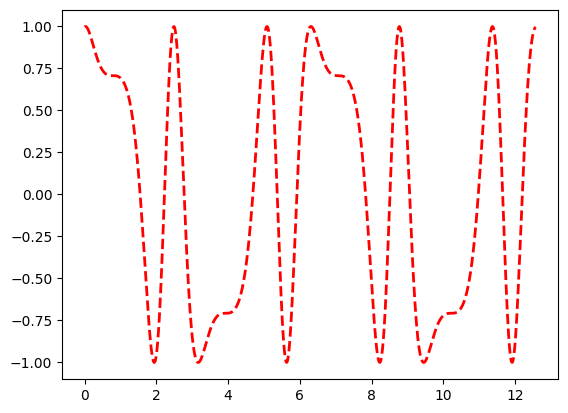

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f08fa1982e8>

In [5]:
using PyPlot
x = range(0, stop = 4*pi, length=1000)
y = sin.(3*x + 1.5*cos.(2*x))

plot(x, y, color="red", linewidth=2.0, linestyle="--")

In [10]:
using SymPy
x = symbols("x")      # or   @vars x, Sym("x"), or  Sym(:x)
y = sin(10 * pi*x)
y(1), y(2.2), y(123456)

(-1.22464679914735e-15, 4.41120439947682e-15, 6.39055017337619e-11)

In [11]:
simplify(diff(sqrt(2 + exp(x)) / (1 + x - cos(x)^2), x))

⎛       2   ⎞  x     ⎛ x    ⎞               
⎝x + sin (x)⎠⋅ℯ  - 2⋅⎝ℯ  + 2⎠⋅(sin(2⋅x) + 1)
────────────────────────────────────────────
                       2    ________        
          ⎛       2   ⎞    ╱  x             
        2⋅⎝x + sin (x)⎠ ⋅╲╱  ℯ  + 2         

In [12]:
using Test

foo(x) = length(x)^2

α = 1

@testset "foo" begin
    @test α == 2-1
    @test π ≈ 3.14 atol=0.01
    @test isapprox(9.81, 10, atol=0.2)
    @test foo("foo") == 9
end

Test Summary: | Pass  Total
foo           |    4      4

Test.DefaultTestSet("foo", Any[], 4, false)

In [0]:
using SpecialMatrices

In [0]:
using ApproxFun

## HomotopyContinuation

Taken from https://www.juliahomotopycontinuation.org/examples/cyclooctane/

In [0]:
using HomotopyContinuation, LinearAlgebra, DynamicPolynomials

c² = 2

@polyvar z[1:3, 1:6]
z_vec = vec(z)[1:17] # the 17 variables in a vector
Z = [zeros(3) z[:,1:5] [z[1,6]; z[2,6]; 0] [√c²; 0; 0]] # the eight points in a matrix

# define the functions for cyclooctane:
F1 = [(Z[:, i] - Z[:, i+1]) ⋅ (Z[:, i] - Z[:, i+1]) - c² for i in 1:7]
F2 = [(Z[:, i] - Z[:, i+2]) ⋅ (Z[:, i] - Z[:, i+2]) - 8c²/3 for i in 1:6]
F3 = (Z[:, 7] - Z[:, 1]) ⋅ (Z[:, 7] - Z[:, 1]) - 8c²/3
F4 = (Z[:, 8] - Z[:, 2]) ⋅ (Z[:, 8] - Z[:, 2]) - 8c²/3
f = [F1; F2; F3; F4]


In [2]:
n = 2 # dimension of the cyclooctane variety
N = 17 # ambient dimension
@polyvar Aᵥ[1:n, 1:N] bᵥ[1:n] # variables for the linear equations
p = [vec(Aᵥ); bᵥ] # parameters
F = [f; Aᵥ * z_vec - bᵥ] # the polynomial system we have to solve

# now we solve one particular instance for A,b complex. we use this as start system
A₀ = randn(ComplexF64, n, N)
b₀ = randn(ComplexF64, n)
p₀ = [vec(A₀); b₀]

F₀ = [subs(Fᵢ, p => [vec(A₀); b₀]) for Fᵢ in F]
complex_result = solve(F₀)
S_p₀ = solutions(complex_result)

Tracking 32768 paths... 100%|████████████████████████████████████████| Time: 0:02:32
  # paths tracked:                  32768
  # non-singular solutions (real):  1408 (0)
  # singular solutions (real):      0 (0)
  # total solutions (real):         1408 (0)


1408-element Array{Array{Complex{Float64},1},1}:
 [-0.47140452079103157 - 2.422449305177514e-18im, -0.16384237851714517 + 0.2552019284126488im, 1.3479702017333817 + 0.03101915079392895im, -1.0455095604262024 + 0.7933755866659716im, 1.2898783954781725 + 0.5587198843935196im, 1.8765476693717755 + 0.05797937064992404im, 24.735366995427633 + 10.625824542195016im, 13.310996213665462 - 2.2224614153547333im, 9.827663410548107 - 27.61816720417769im, 0.13149256848157667 - 0.08445250104374812im, -0.8930876777097178 + 0.12398508334875953im, 1.450721420349676 - 0.13974025496718226im, 1.1135955726342797 - 0.5858587155439727im, -2.106284509545492 - 0.2071323352891917im, 1.2046193901745286 - 0.5083757604920134im, 1.8856180831641267 + 1.2683105876356778e-43im, -1.3333333333333335 + 1.793662034335766e-43im]
 [-0.47140452079103057 - 6.617828928240829e-16im, -3.4086937947479607 + 2.5181841839755585im, 2.6476833435081675 + 3.2419733360472622im, 2.5052403040075135 + 0.1920065064866999im, 0.3419975943943175

In [3]:
tracker = pathtracker(F; parameters=p, generic_parameters=p₀)

# we compute 100 random intersections
data = [randn(n*N+n) for _ in 1:100]
Ω = map(data) do pp
    # We want to store all solutions. Create an empty array.
    S_p = similar(S_p₀, 0)
    for s in S_p₀
        result = track(tracker, s; target_parameters=pp, details=:minimal)
        # check that the tracking was successfull and that we have a real solution
        if is_success(result) && is_real(result)
            # only store the solutions
            push!(S_p, solution(result))
        end
    end
    # return an array of type Array{Float64}
    # (and not Array{ComplexF64})
    real.(S_p)
end
Ω = vcat(Ω...)

794-element Array{Array{Float64,1},1}:
 [-0.47140452079103135, -1.0450657970165176, 0.8280188751979082, -1.4072716179482827, -1.8276293465988476, 0.1126538863121203, -0.8376968482498709, -2.2386216369390524, -1.114810947808969, 0.40168704888186707, -2.8742312373669674, -0.870009004649992, 1.4568131830371633, -1.9849387596762313, -1.1796341492122016, 1.8856180831641267, -1.3333333333333335]
 [-0.47140452079103135, -0.8787951153546268, 1.0027446948284624, -1.5699566040480526, -1.616862376833217, 0.5043070980270642, -1.1150400951914357, -2.85830851549161, 0.0024480991241107356, 0.2768074075497607, -2.9749202829205923, 0.2241736610473671, 0.9710783993831666, -2.1566719393661917, -0.6969438331786075, 1.8856180831641267, -1.3333333333333335]
 [-0.4714045207910314, -0.7946734805177347, -1.0706408534796377, 0.25094213821647227, -0.47990298318034214, -2.245006570889111, 1.4959527579877956, 0.09154072488973561, -1.89372229118997, 2.531459755327646, -0.8340187087968385, -2.1603024727001405, 2.918

In [0]:
using JuMP
using Ipopt
m = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(m, 0 <= x <= 2 )
@variable(m, 0 <= y <= 30 )
@objective(m, Min, x*x+ 2x*y + y*y )
@constraint(m, x + y >= 1 )
optimize!(m)
println(termination_status(m))
println("| x = ", JuMP.value(x), "| y = ", JuMP.value(y))